📁 相似度矩阵已保存: /home/charles/HZU/Industrial_Software_Testing/Industrial_Software_Testing/my_CIL_V1/GCL_pre_train/KAIST_CWT/result/CWT_cosine_silimar/CWT_cosine_silimar.csv


/tmp/ipykernel_5208/91253820.py:58: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_5208/91253820.py:58: UserWarning: Glyph 21035 (\N{CJK UNIFIED IDEOGRAPH-522B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_5208/91253820.py:58: UserWarning: Glyph 20313 (\N{CJK UNIFIED IDEOGRAPH-4F59}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_5208/91253820.py:58: UserWarning: Glyph 24358 (\N{CJK UNIFIED IDEOGRAPH-5F26}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_5208/91253820.py:58: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_5208/91253820.py:58: UserWarning: Glyph 20284 (\N{CJK UNIFIED IDEOGRAPH-4F3C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_5208/91253820.py:58: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from

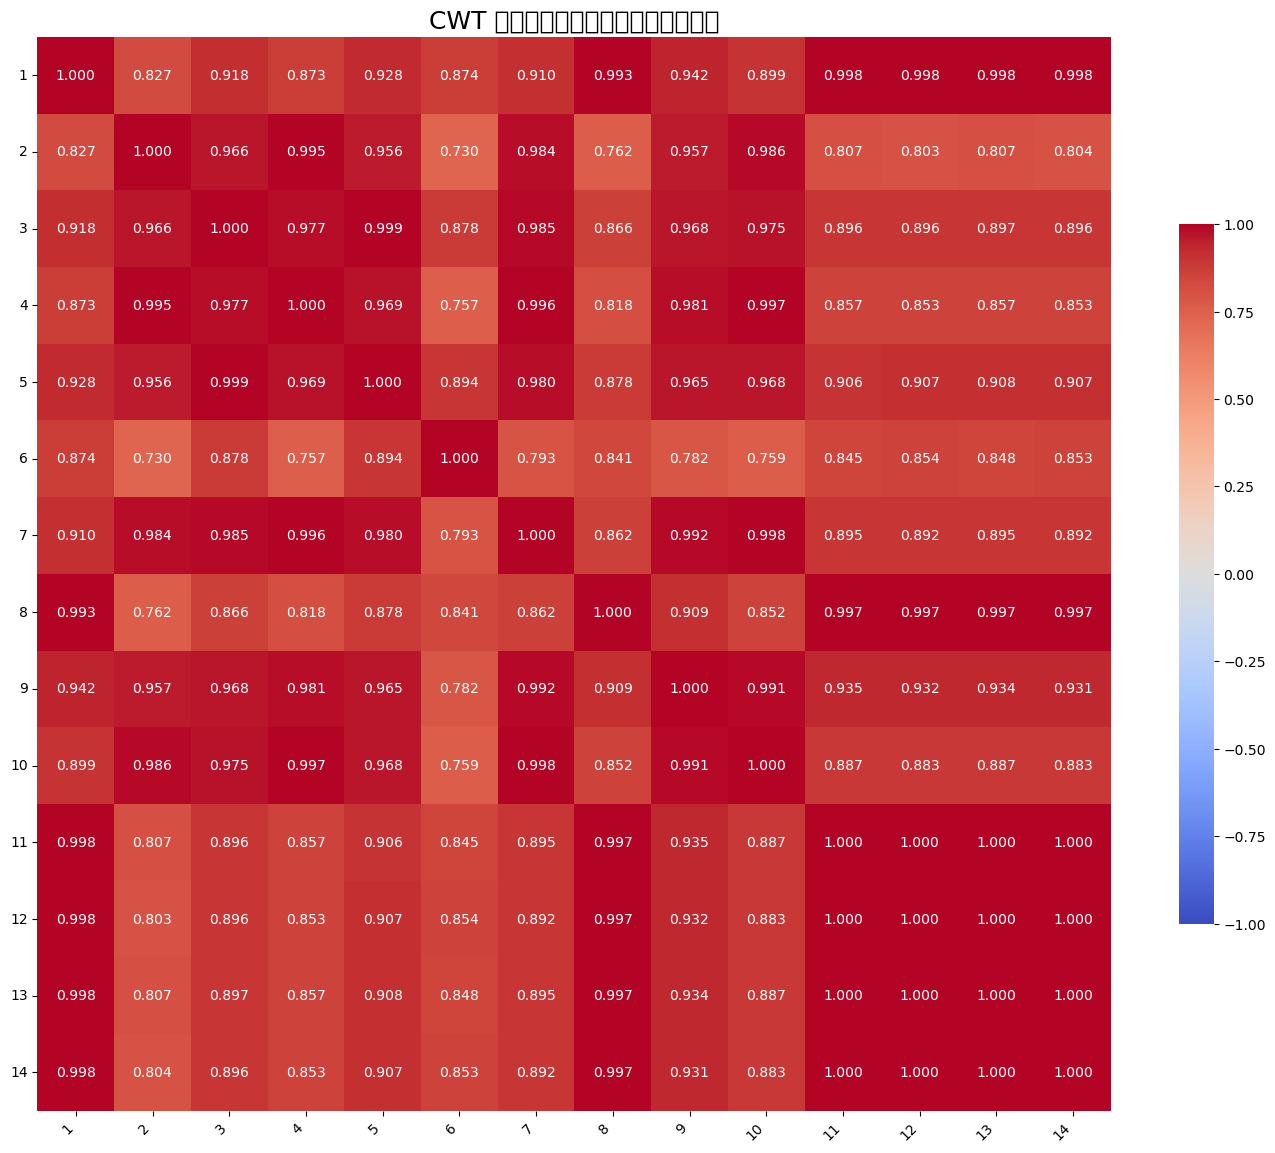

📁 热力图（带数字）已保存: /home/charles/HZU/Industrial_Software_Testing/Industrial_Software_Testing/my_CIL_V1/GCL_pre_train/KAIST_CWT/result/CWT_cosine_silimar/CWT_similarity_heatmap_with_numbers.png


In [4]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import os

# ====================== 1. 路径 ======================
train_path = "/home/charles/HZU/Data_processed/my_CIL_V1/KAIST/KAIST_CWT/train/train_CWT.csv"
val_path   = "/home/charles/HZU/Data_processed/my_CIL_V1/KAIST/KAIST_CWT/val/val_CWT.csv"
test_path  = "/home/charles/HZU/Data_processed/my_CIL_V1/KAIST/KAIST_CWT/test/test_CWT.csv"

save_csv = "/home/charles/HZU/Industrial_Software_Testing/Industrial_Software_Testing/my_CIL_V1/GCL_pre_train/KAIST_CWT/result/CWT_cosine_silimar/CWT_cosine_silimar.csv"
save_fig = "/home/charles/HZU/Industrial_Software_Testing/Industrial_Software_Testing/my_CIL_V1/GCL_pre_train/KAIST_CWT/result/CWT_cosine_silimar/CWT_similarity_heatmap_with_numbers.png"

os.makedirs(os.path.dirname(save_fig), exist_ok=True)

# ====================== 2. 读取数据 ======================
df_train = pd.read_csv(train_path)
df_val   = pd.read_csv(val_path)
df_test  = pd.read_csv(test_path)
df = pd.concat([df_train, df_val, df_test], axis=0).reset_index(drop=True)

# ====================== 3. 特征 ======================
feature_cols = df.columns[1:-1]      # 第一列不要
label_col = df.columns[-1]
X = df[feature_cols].values
y = df[label_col].values

# ====================== 4. 类别均值 ======================
class_means = {}
for cls in np.unique(y):
    class_means[cls] = X[y == cls].mean(axis=0)

# ====================== 5. 相似度矩阵 ======================
classes = sorted(class_means.keys())
mean_matrix = np.vstack([class_means[c] for c in classes])
similarity_matrix = cosine_similarity(mean_matrix)
sim_df = pd.DataFrame(similarity_matrix, index=classes, columns=classes)

sim_df.to_csv(save_csv)
print(f"📁 相似度矩阵已保存: {save_csv}")

# ====================== 6. 画热力图（带数字） ======================
plt.figure(figsize=(14, 12))
sns.heatmap(
    sim_df.round(3),        # 保留三位小数
    annot=True,             # 显示数字
    fmt=".3f",              # 数字格式
    cmap="coolwarm",
    square=True,
    cbar_kws={"shrink": .6},
    vmin=-1, vmax=1
)
plt.title("CWT 类别余弦相似度热力图（带数值）", fontsize=18)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig(save_fig, dpi=300)
plt.show()

print(f"📁 热力图（带数字）已保存: {save_fig}")
